In [1]:
import os
import glob
import numpy as np
import pandas as pd
import random
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'predictive_model/output_files_RF/'

from scripts.io_library import MyLib
from scripts.utils import Utils

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

In [3]:
root_dir = ''

# Step1. 

Run the script "prediction_dataset.py" independently to create and save the datasets in "input_data/dependency_prediction_data/" directory.

# Step2.

Run the script "predictive_model.py" independently and save the results in the "input_data/random_forest_results/". Note that despite initializing the seed, the results might slightly vary on different platforms.

# Step3: Analysis

## Load dataset

In [4]:
data_dir = 'predictive_model/output_files_RF/dependency_prediction_data'
features_file = 'Features_BTC.hdf5'
targets_file = 'Targets_BTC_GeneEffects.hdf5'
features_df = MyLib.load_h5py(os.path.join(data_dir, features_file))
targets_df = MyLib.load_h5py(os.path.join(data_dir, targets_file))

predictive_model/output_files_RF/dependency_prediction_data/Features_BTC.hdf5  is loaded, shape:  (39, 55611)

predictive_model/output_files_RF/dependency_prediction_data/Targets_BTC_GeneEffects.hdf5  is loaded, shape:  (39, 18443)



In [5]:
random_forest_results_dir = 'predictive_model/output_files_RF/random_forest_results'

summary_df = pd.read_csv(os.path.join(random_forest_results_dir, '1RF_summary.csv'), index_col=0).T
summary_df.head()

DepMap_ID,corr,mse,mae
ABI1 (10006),0.3500,0.0482,0.1637
AHCYL1 (10768),0.5862,0.1530,0.3174
ARHGEF7 (8874),0.4859,0.1236,0.2768
BRAF (673),0.8465,0.0742,0.1704
BRK1 (55845),0.1363,0.1042,0.2485


## HNF1B

HNF1B (6928)


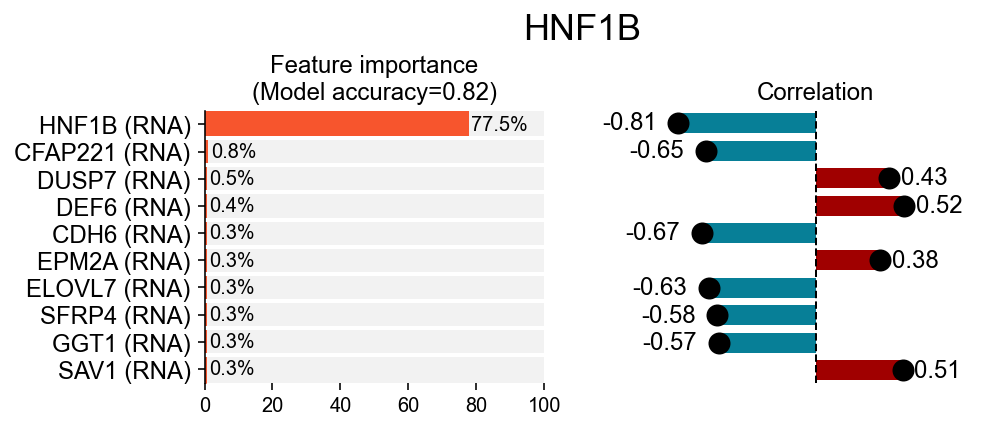

In [6]:
gene = 'HNF1B (6928)'
Utils.visualize_feature_importance(gene, random_forest_results_dir, features_df, targets_df, summary_df, save_figure=True, wspace=0.3)

## TP63

TP63 (8626)


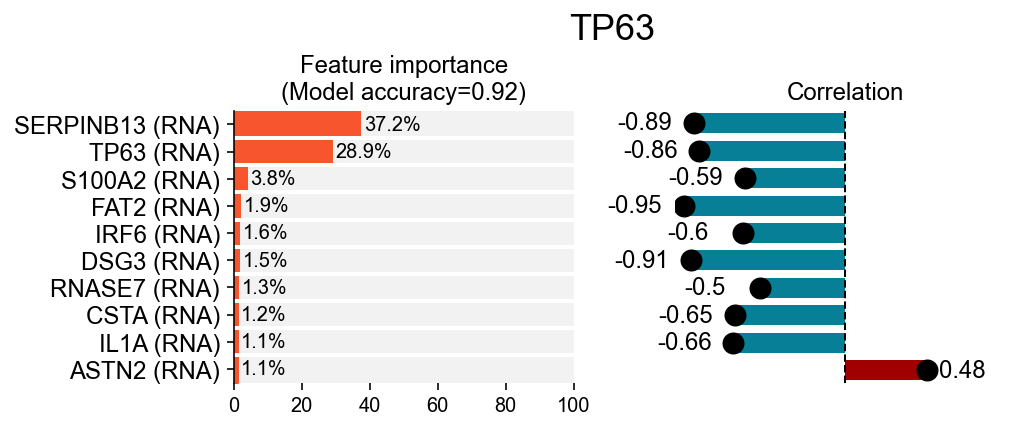

In [20]:
gene = 'TP63 (8626)'
Utils.visualize_feature_importance(gene, random_forest_results_dir, features_df, targets_df, summary_df, save_figure=True)

## NXT1

NXT1 (29107)


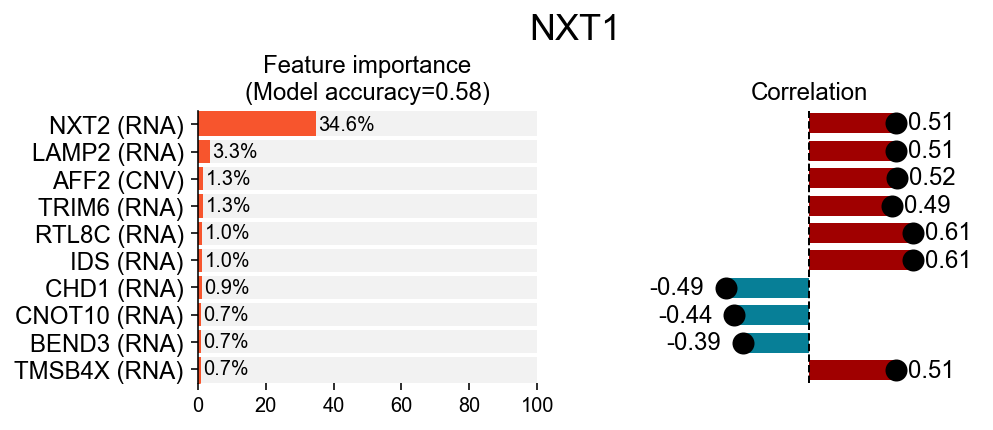

In [21]:
gene = 'NXT1 (29107)'
Utils.visualize_feature_importance(gene, random_forest_results_dir, features_df, targets_df, summary_df, save_figure=True)